# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [3]:
data.sort_values(by=['Direct_Bilirubin'], inplace=True)

In [4]:
X = data[['Direct_Bilirubin']]
medv = data[['Total_Bilirubin']]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    medv,
    test_size = 0.2,
    random_state = 42
)

In [6]:
X_train_lstat = X_train[['Direct_Bilirubin']]
X_test_lstat = X_test[['Direct_Bilirubin']]

In [7]:
X_train_lstat = np.array(X_train_lstat).reshape(-1, 1)
X_test_lstat = np.array(X_test_lstat).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(X_train_lstat, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.score(X_test_lstat, y_test)

0.9430572779725597

Это чистая линейная регрессия.  Точность 94%.  На графике видно линейную зависимость.  Вряд - ли полиномиальная регрессия улучшит такую точность.

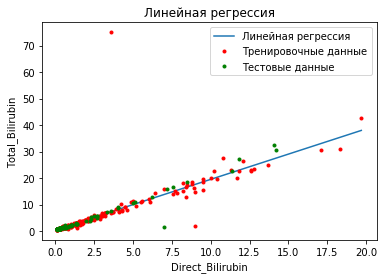

In [11]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(X_train_lstat), max(X_train_lstat), 100)
y = (model.coef_*x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train_lstat, y_train, 'r.')
plt.plot(X_test_lstat, y_test, 'g.')
plt.legend(['Линейная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train_lstat)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test_lstat), y_test)

0.9396246797134117

Чуть хуже.  Странно, я думал, будет много хуже)))

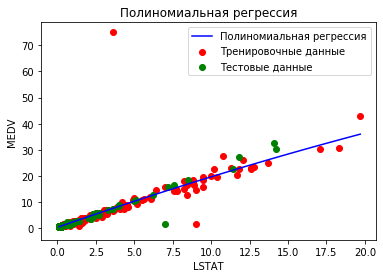

In [13]:
plt.scatter(X_train_lstat, y_train, c='red')
plt.scatter(X_test_lstat, y_test, c='green')
x = np.linspace(min(X_test_lstat), max(X_train_lstat), 100)
y = pol_reg.predict(poly_reg.fit_transform(x))
plt.plot(x, y, 'b')
plt.title('Полиномиальная регрессия')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Да полиномиальная здесь, по сути, не отличается от линейной

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

In [14]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [15]:
len(data)

583

In [16]:
X = data.drop(['Dataset', 'Gender'], axis=1) #Gender убираем потому, что в нем текстовые данные
y = data.Dataset

In [17]:
from sklearn.linear_model import LogisticRegression

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [18]:
X_train.isnull().sum() #там всего 4 NaN в последнем столбце

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
dtype: int64

In [19]:
X_train.fillna(0, inplace = True)

C:\Users\Igor\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [20]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [21]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.78      0.95      0.86        87
           2       0.64      0.23      0.34        30

    accuracy                           0.77       117
   macro avg       0.71      0.59      0.60       117
weighted avg       0.75      0.77      0.73       117



Не очень хороший результат. Особенно в классе 2

Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

In [22]:
mxcorr = data.corr()
mxcorr[abs(mxcorr.Dataset) > 0.16]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


Получается, что корреляций более 50% в этом датасете не существует.  Выберем кореляции, модуль которых превышает 16

In [23]:
from sklearn.metrics import classification_report
X = data[['Total_Bilirubin',
          'Direct_Bilirubin',
          'Alkaline_Phosphotase',
          'Alamine_Aminotransferase',
          'Albumin',
          'Albumin_and_Globulin_Ratio']]
y = data.Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
X_train.fillna(value = 0, axis = 1, inplace = True)
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.77      0.98      0.86        87
           2       0.67      0.13      0.22        30

    accuracy                           0.76       117
   macro avg       0.72      0.56      0.54       117
weighted avg       0.74      0.76      0.70       117



C:\Users\Igor\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


Лучше не стало.  Стало хуже.  Я еще попробовал сократить число параметров в Х, стало еще хуже.

Пример, как считать квантили:

In [24]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

Пример квартилей:

In [26]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


In [27]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех колонок. 

In [28]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [29]:
#Делаем выборку по наличию болезни: менее 50 и более 50 лет
data_ill_less50 = data[(data['Dataset'] == 1) & (data['Age'] <= 50)]
data_ill_more50 = data[(data['Dataset'] == 1) & (data['Age'] > 50)]

(array([26., 34., 34., 22., 13., 13., 15.,  0.,  0.,  1.]),
 array([51. , 54.9, 58.8, 62.7, 66.6, 70.5, 74.4, 78.3, 82.2, 86.1, 90. ]),
 <a list of 10 Patch objects>)

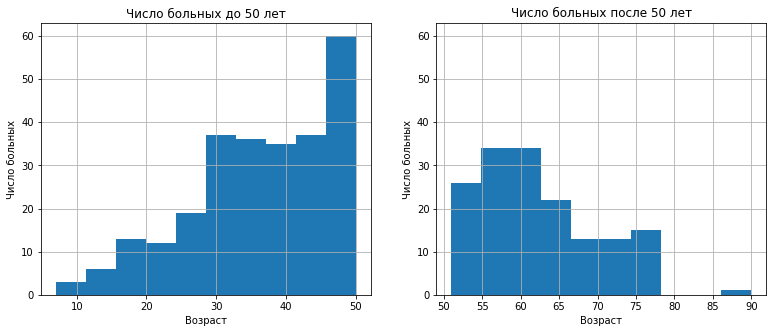

In [30]:
fig, ax = plt.subplots(1,2, figsize = (13,5))
ax[0].set(title = 'Число больных до 50 лет', 
          xlabel = 'Возраст', 
          ylabel = 'Число больных')
ax[1].set(title = 'Число больных после 50 лет', 
          xlabel = 'Возраст', 
          ylabel = 'Число больных')
ax[0].grid(True)
ax[1].grid(True)
ax[1].set_ylim(0, 63)
ax[0].hist(data_ill_less50['Age'])
ax[1].hist(data_ill_more50['Age'])

In [31]:
print(f"Среднее возраст больных людей до 50 лет = {data_ill_less50['Age'].mean():.2f} лет")
print(f"Квантиль 0,5 для больных людей до 50 лет = {data_ill_less50['Age'].quantile(.50):.2f} лет")
print(f"Среднее возраст больных людей после 50 лет = {data_ill_more50['Age'].mean():.2f} лет")
print(f"Среднее возраст больных людей после 50 лет = {data_ill_more50['Age'].quantile(.50):.2f} лет")

Среднее возраст больных людей до 50 лет = 36.32 лет
Квантиль 0,5 для больных людей до 50 лет = 38.00 лет
Среднее возраст больных людей после 50 лет = 62.21 лет
Среднее возраст больных людей после 50 лет = 60.00 лет


Распределения несимметричны в обоих выборках, поэтому среднее значение отличается от медианы (квартиля 0.5).  Причем в первой выборке в большую сторону, во второй - в меньшую.


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [43]:
ill_tblrb = data[data['Dataset'] == 1]['Total_Bilirubin']
stats.ttest_1samp(ill_tblrb, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

P-value менее 5%.  Это означает, что нулевая гипотеза о похожести выборки на генеральную реализуется с маленькой вероятностью, или, иными словами, неверна.

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [44]:
healthy_tblrb = data[data['Dataset'] == 2]['Total_Bilirubin']
stats.ttest_ind(ill_tblrb, healthy_tblrb)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

В данном случае P-value близка к 0.  Следовательно, группы не имеют схожести.

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [47]:
group_1 = data[data['Age'] <= 30]['Dataset']
group_2 = data[(data['Age'] > 30) & (data['Age'] <= 55)]['Dataset']
group_3 = data[data['Age'] > 55]['Dataset']
stats.f_oneway(group_1, group_2, group_3)

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

Да, действительно, группы отличаются.  P-Value меньше -0,1%

Вопросы задавать на почту yustiks@gmail.com